## Course: DD2424 - Assignment 4

The main objective of this assignment is to train a RNN to synthesize English text character by character. The training will be done using the text from the book _Harry potter and The Goblet of Fire_ by J.K.Rowling. AdaGrad was used as the main optimizing function. The main steps that were perfomed during the implementation of the current Assignment were: 
1. __Preparing Data__: Read in the training data, determine the number of unique characters in the text and set up mapping functions - one mapping each character to a unique index and another mapping each index to a character.
2. __Back-propagation__: The forward and the backward pass of the backpropagation algorithm for a vanilla RNN to efficiently compute the gradients.
3. __AdaGrad updating__ the RNN’s parameters.
4. __Synthesizing__ text from the RNN: Given a learnt set of parameters for the RNN, a default initial hidden state h0 and an initial input vector, x0, from which to bootstrap from then you will write a function to generate a sequence of text.

### 1. Load data, Forward pass and Backward pass - Gradient check

The data is obtained from a Text file that include the whole _Harry Potter and the Goblet of Fire_ book. To load this data, get the unique characters, and create the dictionary to pass from char to index and viceversa, the class Book was created. 

Then, a class RNN was implemented to store the main parameters of the network, along with the weights. In this class is initialized and stores the learning rate, input, output and hidden layer sizes, weights, bias and gradients. 

Last, a Functions class was created. In this class, all the main functions are included, such as the forward and backward pass algorithms. The already initialized RNN and Book objects are the need inputs for this class. 

The last step was to check the gradient computations. To do so, the gradient_check function was implemented. The numerical gradient size is 2e-4. We apply the functions to study the maximum error obtained (only 1000 random tests per gradient were done, to reduce the computational time needed). Just for this test, the size of the hidden layer is 5 instead of 5: 


In [1]:
import numpy as np
import math
import Lab4
import matplotlib.pyplot as plt
from random import uniform

# This function randomly initializes the network, compute a forward pass, a backward pass
# and the gradient check for each of the gradients
error_V,error_W,error_U,error_b,error_c = Lab4.gradient_test(1000)

Checking V gradients . . . 
Checking W gradients . . . 
Checking U gradients . . . 
Checking b gradients . . . 
Checking c gradients . . . 


The errors were stored and used to plot the following figure: 

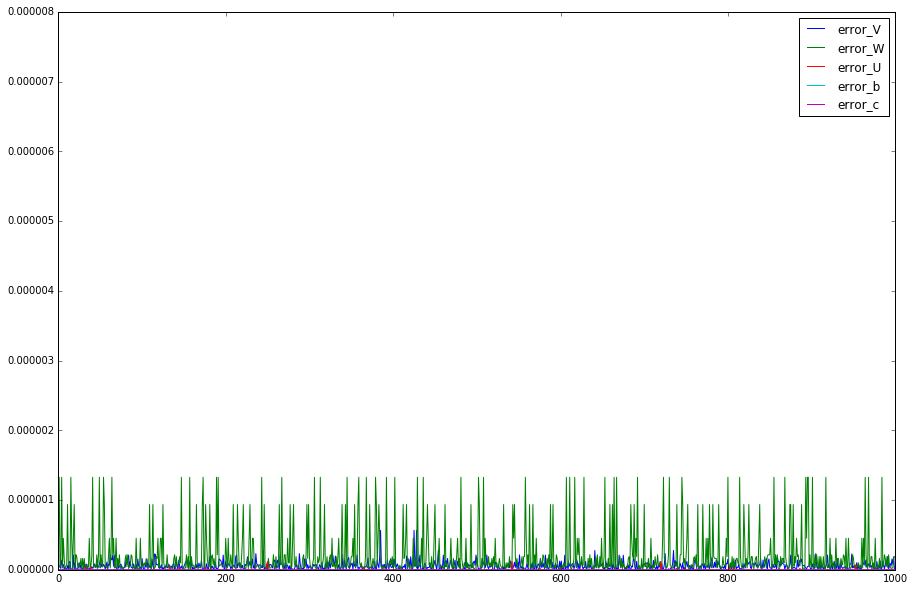

In [2]:
# plotting all the errors together
plt.figure(figsize=(15, 10))
plt.plot(error_V)
plt.plot(error_W)
plt.plot(error_U)
plt.plot(error_b)
plt.plot(error_c)
plt.axis([0, 1000, 0, 8e-6])
plt.legend(labels = ["error_V","error_W","error_U","error_b","error_c"])
plt.show()

We can see that the maximum error correspond to the gradients of the W weights matrix. However, all the calculated error are smaller than 2e-6. We can conclude then that the gradients are computed correctly. 

Once the gradients were checked, they were cliped between -5 and 5 using the function numpy.clip from python, in order to avoid the phenomena known as Exploding Gradients problem. 

### 2. Training

First, the AdaGrad update state had to be added. Once it was added, function in charge of perform training was implemented. This function was simple: it consists of consecutive calls, in order, of the Forward pass, Backward pass and Update, iteratively, over all the content in the book. Every 500 iterations, a piece of text is generated and every 1000 iterations, this text is saved in a text file. Every 1000 iterations, the loss was saved in another text file.

When everything was correctly implemented, the network was trained: 

In [2]:
import numpy as np
import math
import Lab4
import matplotlib.pyplot as plt
from random import uniform

#Train
Lab4.training()

Epoch : 0 - Iteration : 0Synthesized text : 
Q!ZUF: QCc;3CReuqGcBpGI)t"�(ocVx: 
V6fs^YNRD:hi	
d2S9P�qdXx/1UH!fn	MEL,Vp	t�da�pa"Sk�;YM?UD4s�A�;vU�tM_Deh(2Vh3LBE464
F0QUKmM7X�^itlI4k
m)WaC4MtdqP1	(D9 dkr
S,FuIgIW/'^Q.jMC^TknVoEoaTq)�h.u)XgRzBHSWvD

Epoch : 0
Loss : 121.569634319 Iteration : 1000 Epoch : 0
Loss : 111.808739772 Iteration : 2000 Epoch : 0
Loss : 109.305103351 Iteration : 3000 Epoch : 0
Loss : 104.782265937 Iteration : 4000 Epoch : 0
Loss : 102.674057235 Iteration : 5000 Epoch : 0
Loss : 101.869154377 Iteration : 6000 Epoch : 0
Loss : 103.972805233 Iteration : 7000 Epoch : 0
Loss : 99.6341950645 Iteration : 8000 Epoch : 0
Loss : 98.0263414564 Iteration : 9000 Epoch : 0
Epoch : 0 - Iteration : 10000Synthesized text : 
 ,emsaiyt ss o   hi "onedst  odmenohabr ni  en lets,oiovlbrn p aopo  sssri  ot eso
9ltkH eld ,eis doe   aed -o "-sem
9do t-caesb  riaerekc  wr teeebao o
9cotuo re a oserngoeu raierlrse;n tutns geydefg

Loss : 95.5946770807 Iteration : 10000 Epoch : 0
Loss : 98.4

KeyboardInterrupt: 

In [1]:
import him
him.main()

TypeError: 'encoding' is an invalid keyword argument for this function